In [7]:
# load click stream

with open('./click_stream.txt', 'r') as f:
    all_stream = f.readlines()

all_stream

['~~~~ 未婚妻\n',
 '127.0.0.1 - - [31/May/2018 07:58:16] "POST /callback HTTP/1.1" 200 -\n',
 '*****{"events":[{"type":"message","replyToken":"c0bbcd14bf4846eab95d2b5d54035b9c","source":{"userId":"U5866f9b217a5f0bc083a11b639da318f","type":"user"},"tim$\n',
 'stamp":1527735601053,"message":{"type":"text","id":"8042968638148","text":"我愛你"}}]}\n',
 '~~~~ 我愛你\n',
 '127.0.0.1 - - [31/May/2018 07:58:54] "POST /callback HTTP/1.1" 200 -\n',
 '*****{"events":[{"type":"message","replyToken":"9c41f14e352345b1a55b29ca1da1038f","source":{"userId":"U26b758aa13312ae40bf926482ec431ce","type":"user"},"time\n',
 'stamp":1527735604188,"message":{"type":"text","id":"8042968836937","text":"有錢"}}]}\n',
 '~~~~ 有錢\n',
 '127.0.0.1 - - [31/May/2018 07:58:57] "POST /callback HTTP/1.1" 200 -\n',
 '*****{"events":[{"type":"message","replyToken":"78c8393cdf9b499ca539f5e56fe93e65","source":{"userId":"U26b758aa13312ae40bf926482ec431ce","type":"user"},"time\n',
 'stamp":1527735614584,"message":{"type":"text","id":"804296

In [27]:
# filtered noise

filtered = [row  for row in all_stream if "stamp" in row and "timestamp" not in row and  "text" in row]

all_data = []

for a in filtered:
    
    stamp = a.split(',')[0].split(':')[-1]
    iid = a.split(',')[2].split(':')[-1].replace('"','')
    text = a.split(',')[3].split(':')[-1].replace("}}]}",'').replace('"','').strip()
    all_data.append([stamp, iid ,text])
    
all_data


[['1527735601053', '8042968638148', '我愛你'],
 ['1527735604188', '8042968836937', '有錢'],
 ['1527735614584', '8042969499133', '有錢是老大'],
 ['1527735631369', '8042970567990', '有錢是老大'],
 ['1527735657050', '8042972233937', '我愛狐狸姬'],
 ['1527735753004', '8042978549866', '未婚妻'],
 ['1527735758218', '8042978896890', '未婚妻'],
 ['1527735762630', '8042979183176', '未婚妻七'],
 ['1527735772168', '8042979830030', '未婚妻妻妻'],
 ['1527735777821', '8042980208296', '榦'],
 ['1527735780201', '8042980365304', '幹'],
 ['1527735784334', '8042980643880', '我愛大咪咪'],
 ['1527735795475', '8042981386129', '有錢是老大'],
 ['1527735821699', '8042983139293', '有錢是老大'],
 ['1527735838039', '8042984230607', '有錢是老大'],
 ['1527735890291', '8042987749133', '未婚妻'],
 ['1527735952286', '8042991941243', '未婚妻'],
 ['1527736072127', '8043000100905', '未婚妻'],
 ['1527736081859', '8043000766027', '未婚夫'],
 ['1527736088133', '8043001195903', '未婚夫'],
 ['1527736095183', '8043001677461', '我愛美腿'],
 ['1527736122718', '8043003559006', '有錢是老大'],
 ['1527736269114'

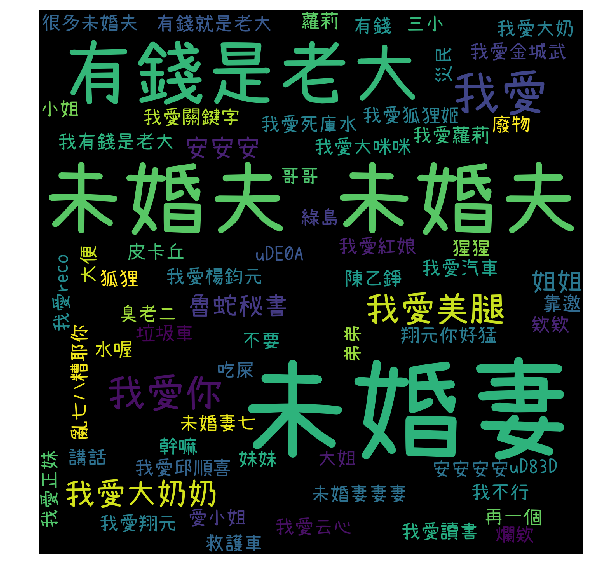

In [37]:
# generate world cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(10,10))

all_text = [i[2] for i in all_data ]

wl_space_split = " ".join(all_text)

font = r'setofont/setofont.ttf'

my_wordcloud = WordCloud(font_path=font, width=1400, height=1400, margin=2).generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()


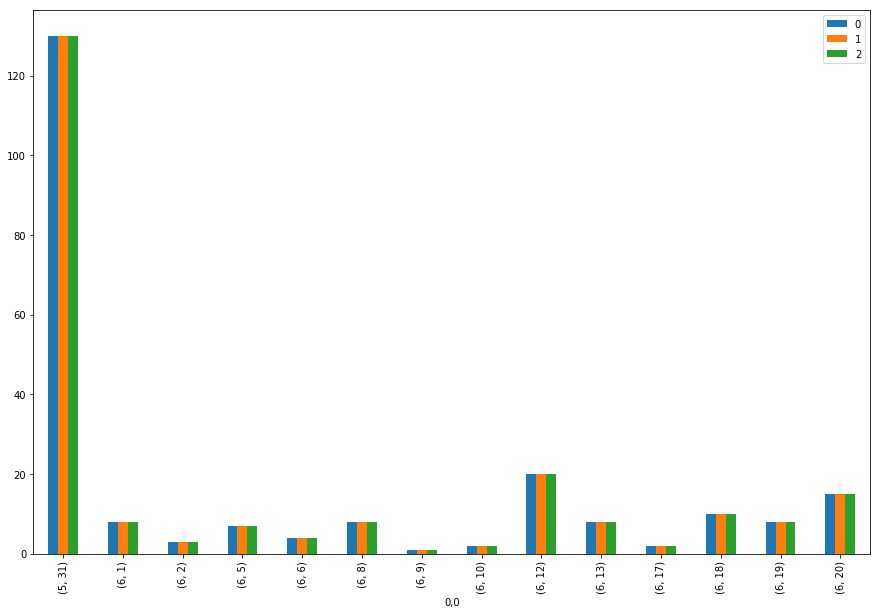

In [61]:
import pandas as pd


df = pd.DataFrame(all_data)

dates = pd.to_datetime(df[0], unit='ms')

df.groupby([dates.dt.month, dates.dt.day]).count().plot(kind="bar" , figsize=(15,10))


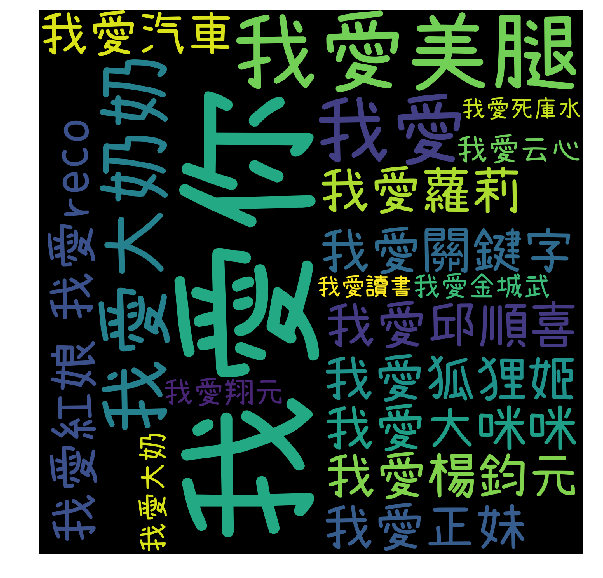

In [86]:
# lovely analysis

lovely = [row[2].replace('我愛','') for row in all_data if '我愛' in row[2]]

lovely = ['我愛' + i   for i in lovely if i is not '']

wl_space_split = " ".join(lovely)

my_wordcloud = WordCloud(font_path=font, width=1400, height=1400, margin=2).generate(wl_space_split)
plt.figure(figsize=(10,10))
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()


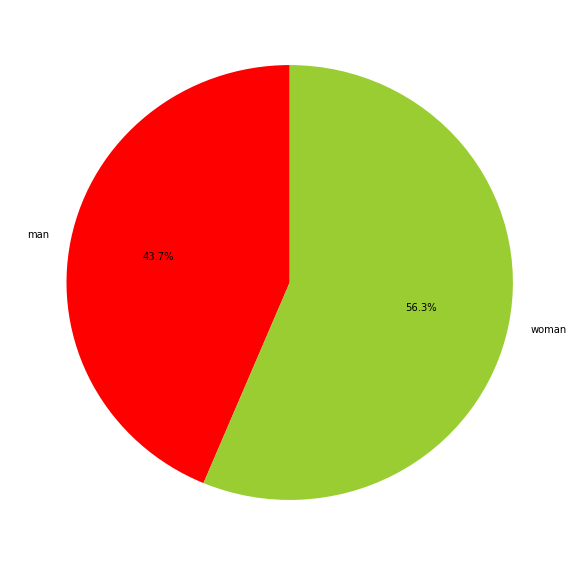

In [78]:
# pie

man = len([1 for row in all_data if '未婚妻' in row[2]])

woman = len([1 for row in all_data if '未婚夫' in row[2]])

labels = ['man','woman']

sizes = [man,woman]

colors = ['red','yellowgreen']
plt.figure(figsize=(10,10))

patches,l_text,p_text = plt.pie(sizes,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6 )

